In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=21, max_depth = 10 )
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=21)

In [9]:
y_pred = rf_model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.83451536643026
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        65
           1       0.65      0.79      0.71        52
           2       0.75      0.73      0.74        59
           3       0.83      1.00      0.91        64
           4       0.99      0.99      0.99        75
           5       0.84      0.72      0.78        53
           6       0.78      0.65      0.71        55

    accuracy                           0.83       423
   macro avg       0.83      0.82      0.82       423
weighted avg       0.84      0.83      0.83       423

Confusion Matrix:
 [[57  7  0  0  0  1  0]
 [ 2 41  1  0  0  3  5]
 [ 0  7 43  5  0  1  3]
 [ 0  0  0 64  0  0  0]
 [ 0  1  0  0 74  0  0]
 [ 1  4  6  1  1 38  2]
 [ 0  3  7  7  0  2 36]]


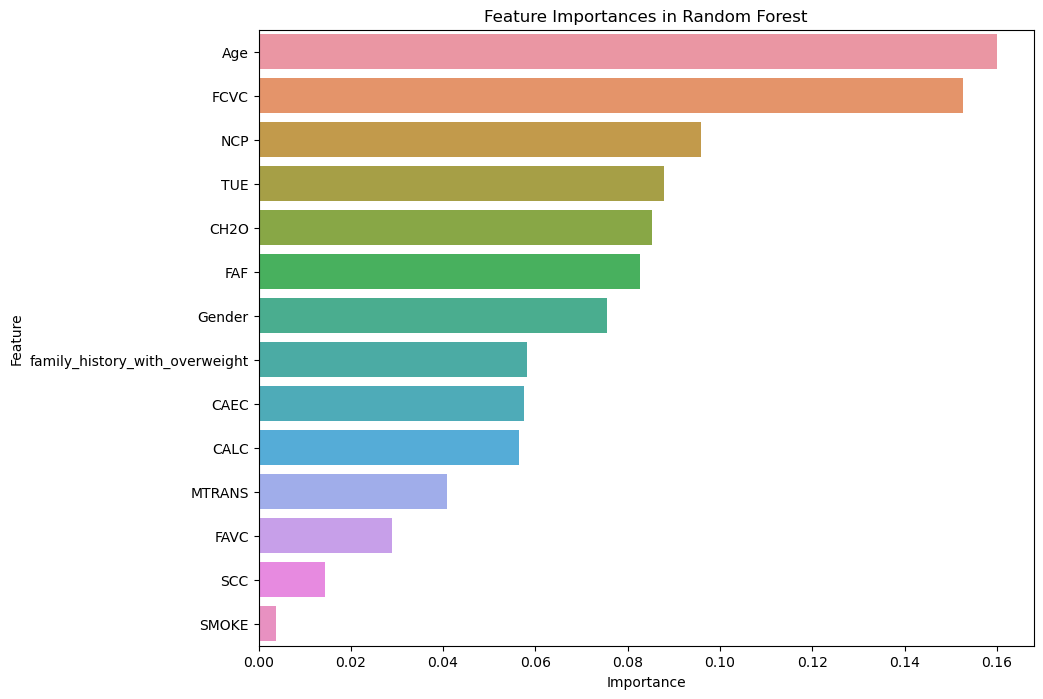

In [12]:
feature_importances = rf_model.feature_importances_
features = X.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances in Random Forest")
plt.show()